For this assignment, we will be working with the [US Health Insurance Dataset]('https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv') from Kaggle.

We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?
---
For each question, make sure to:

1. State your Null Hypothesis and Alternative Hypothesis
2. Select the correct test according to the data type and number of samples
3. Test the assumptions of your selected test.
4. Execute the selected test, or the alternative test (if you do not meet the assumptions)
5. Interpret your p-value and reject or fail to reject your null hypothesis 
6. Show a supporting visualization that helps display the result

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [24]:
#import csv
df = pd.read_csv('/Users/Rashad/Documents/GitHub/Hypothesis Testing with Insurance Data_CORE/Hypothesis-Testing-with-Insurance-Data_CORE/Data/insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Q1. Do smokers have higher insurance charges than non-smokers?

1. Do smokers have a higher average insurance charges than non-smokers?
2. Metric measurement:  'charges'
3. I expect smokers to have higher insurance charges than non-smokers.

***Null Hypothesis:***  There is no difference between insurance charges between smokers and non-smokers.

***Alternate Hypothesis:***  Smokers have a higher average insurance cost than non-smokers.

## The test is based on Numeric data `charges`.

In [26]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


## 2 Sample T-Test

In [27]:
#Filtering data.

sample = df.sample(n=1338,random_state=23)

smoker_charges = sample.loc[ sample['smoker']=='yes',"charges"]
non_smoker_charges = sample.loc[ sample['smoker']=='no',"charges"]

## Getting means for smoker and non-smoker charges
print(f"For SMOKERS (n={len(smoker_charges)}):  Mean\Average={np.mean(smoker_charges):.2f}")
print(f"For NON-SMOKERS (n={len(non_smoker_charges)}):  Mean\Average={np.mean(non_smoker_charges):.2f}")

For SMOKERS (n=274):  Mean\Average=32050.23
For NON-SMOKERS (n=1064):  Mean\Average=8434.27


In [28]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


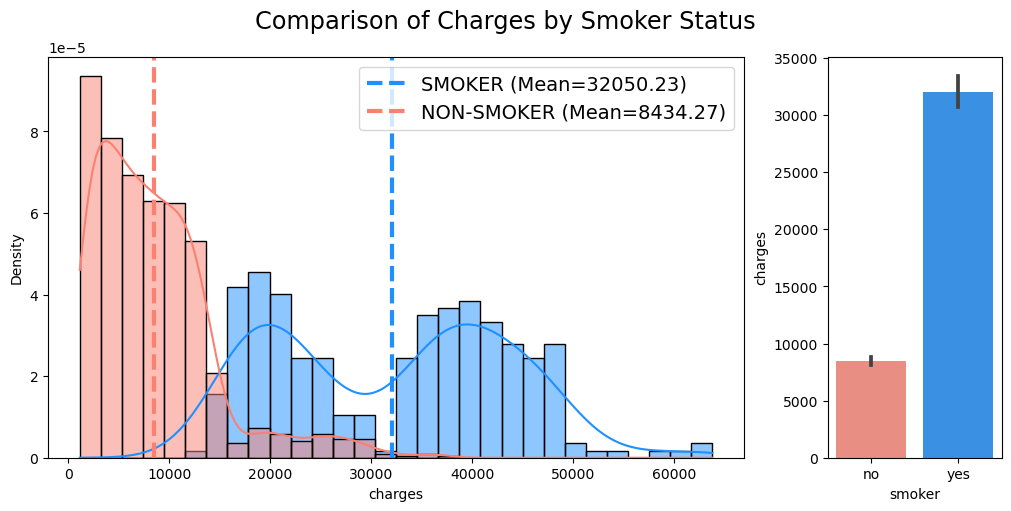

In [29]:
smoker_palette={'yes':'dodgerblue', "no":'salmon'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=sample, x='charges',fill=True,hue='smoker',kde=True,
                  stat='density',common_norm=False,ax=ax,
                  palette=smoker_palette)

ax.axvline(np.mean(smoker_charges), ls='--',lw=3, 
           label=f"SMOKER (Mean={np.mean(smoker_charges):.2f})",color=smoker_palette['yes'])

ax.axvline(np.mean(non_smoker_charges), ls='--', lw=3, 
           label=f"NON-SMOKER (Mean={np.mean(non_smoker_charges):.2f})",color=smoker_palette['no'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=sample, x='smoker',y='charges',ax = ax_bar,palette=smoker_palette)
fig.suptitle('Comparison of Charges by Smoker Status',fontsize='xx-large');

## Testing Assumptions
1. No significant OUTLIERS
2. NORMALITY
3. EQUAL VARIANCE

### Testing for Outliers
NOTE:  Typically z-scores greater than 3 are considered outliers. 

In [30]:
#Smoker Z-Score
zscores_smoker = stats.zscore(smoker_charges)
outliers_smoker = abs(zscores_smoker)>3
print( f"Z-Score for SMOKERS:  {np.sum(outliers_smoker)}" )

Z-Score for SMOKERS:  0


In [31]:
#Non-Smoker Z-Score
zscores_non_smoker = stats.zscore(non_smoker_charges)
outliers_non_smoker = abs(zscores_non_smoker)>3
print( f"Z-Score for NON-SMOKERS:  {np.sum(outliers_non_smoker)}" )

Z-Score for NON-SMOKERS:  24


In [32]:
#Remove outliers from non_smoker group.
## ONLY REMOVE AN OUTLIER ONCE,
## REGARDLESS OF INITIAL VALUE THAT INDICATED THAT REMOVAL WAS NEEDED.

non_smoker_charges = non_smoker_charges[(np.abs(stats.zscore(non_smoker_charges)) < 3)]

In [33]:
#Checking the change of outliner removal.
zscores_non_smoker = stats.zscore(non_smoker_charges)
outliers_non_smoker = abs(zscores_non_smoker)>3
print( f"Z-Score for NON-SMOKERS:  {np.sum(outliers_non_smoker)}" )

Z-Score for NON-SMOKERS:  19


### Checking for Normality - (D’Agostino and Pearson’s Normality Test)
* p < 0.05
    * A p-value less than 0.05 means our distribution is significantly different than a normal distribution.  A p-value less than .05 tells us we can reject the null hypothesis.

* p > 0.05
    * A p-value greater than 0.05 would say that there is no statistical difference between our distribution and a normal distribution which means the tested distribution should be considered normal.

---
#### ***NOTE:  Because the data is not normally distributed, but we have a large enough group size (n) where our group size is (n=1336) the below normality check is did not need to be completed and can be ignored***

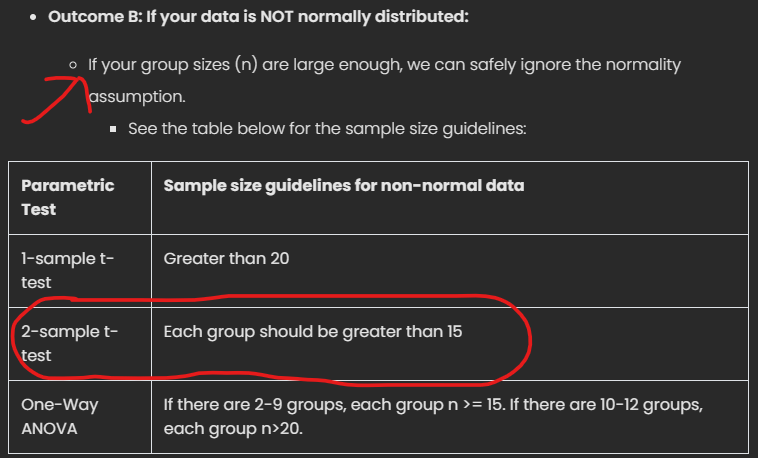

In [34]:
#testing the SMOKER group for Normality
SMOKER_normality = stats.normaltest(smoker_charges)
SMOKER_normality

NormaltestResult(statistic=61.03941356533845, pvalue=5.5649306300356436e-14)

In [35]:
#testing the NON-SMOKER group for Normality
NON_SMOKER_normality = stats.normaltest(non_smoker_charges)
NON_SMOKER_normality

NormaltestResult(statistic=163.803670477892, pvalue=2.6945416315543585e-36)

The p-values for both smoker and non_smoker are both less than 0.05.  The tested distribution is considered different from the normal distribution.

### Test for Equal Variance

In [36]:
# Test for equal variance
result = stats.levene(smoker_charges, non_smoker_charges)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

P-value is less than 0.05.  We do not have equal variance.

### T-Test

In [37]:
from scipy.stats import ttest_ind

In [38]:
## Final t-test, after confirming we meet the assumptions
test_result = stats.ttest_ind(smoker_charges,non_smoker_charges, equal_var=False)
test_result

Ttest_indResult(statistic=33.73230598709252, pvalue=2.575322662587138e-104)

In [39]:
## is our result significant
print(f"p-value={test_result.pvalue:.10f}")
print(f"Significant: {test_result.pvalue <.05}")

p-value=0.0000000000
Significant: True


Based on our t-test, we have a significant result.

A significant result (p < 0.05) means we reject the null hypothesis and support the alternative hypothesis.  In this case, this means that there IS a difference between insurance charges between those who smoke and those who do not smoke.

# Q2. Are men more likely to smoke than women?

1. Are Men more likely to smoke than women?
2. Metric Measurement:  'smoker'
3. I expect that men are more likely to smoke than women.

***Null Hypothesis:***  There is no difference between the number of men who smoke and the number of women who smoke.

***Alternate Hypothesis:***  The number of men who smoke is greater than the number of women who smoke.

In [40]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


## This test is based on the Categorical data column `smoker`.

## Assumptions Testing
1. Must meet the following requirements:
    1. There is no relationship between the distribution of the target category and the categorical features.
    2. There are two categorical variables (ordinal or nominal).
    3. The outcomes are independent.

In [41]:
#changing 'smoker' column to the yes=1 and no=0.
df['smoker'] = df['smoker'].replace(to_replace=({"yes":1,"no":0}))

In [42]:
#saving to a new dataframe to preserve the original dataframe
q2_df = df
q2_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


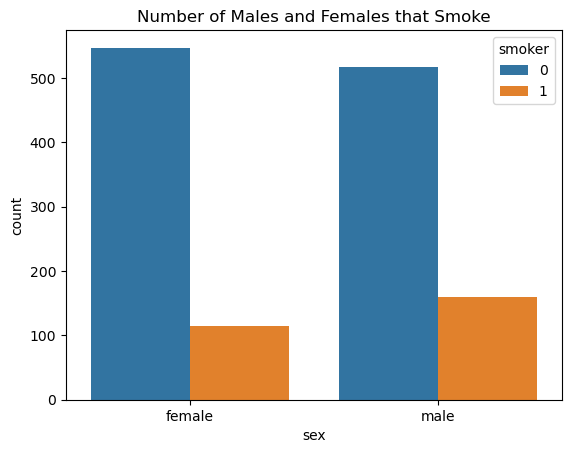

In [43]:
#Visualizing the males and females who smoke.
ax = sns.countplot(data=q2_df, x='sex',hue='smoker',)
ax.set_title("Number of Males and Females that Smoke");

## Getting the Contingency Table with `pd.crosstab`

In [44]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(q2_df['sex'], q2_df['smoker'])
table

smoker,0,1
sex,,
female,547,115
male,517,159


## Running Chi-Squared Test.
p < 0.05

    * A p-value less than 0.05 means our distribution is significantly different than a normal distribution. A p-value less than .05 tells us we can reject the null hypothesis.

p > 0.05

    * A p-value greater than 0.05 would say that there is no statistical difference between our distribution and a normal distribution which means the tested distribution should be considered normal.

In [45]:
# Run the Test and Save the Output
chi2_result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = chi2_result #this labels the results

In [46]:
# What was our p-value?
print(f"P-value is:  {p}")
p<.05

P-value is:  0.006548143503580696


True

P-value is less than 0.05 and we can reject the null hypothesis.  And support the Alternate Hypothesis that men smoke more than women.

# Q3. Do different regions have different charges, on average?
1. Are the average charges of all regions different.
2. Metric Measurement:  'charges'
3. I expect that all regions will have a significantly different average charge between all of them.

***Null Hypothesis:***  All regions have the same average charges.

***Alternate Hypothesis:***  All regions have significantly different charges.

## The data type of this test is Numeric.

In [47]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


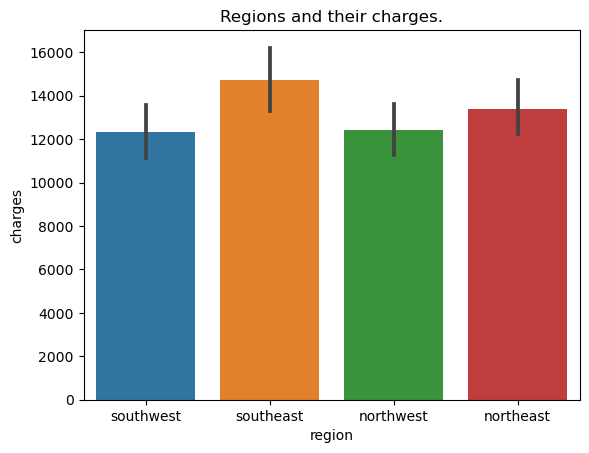

In [48]:
# visualisation of data.
ax = sns.barplot(data=df, x='region',y='charges')
ax.set_title("Regions and their charges.");

In [49]:
## Create groups dictionary.
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

# Testing Assumptions

## Normality
-Test size (n) is large enough for each group (where n=1338) where normality testing is not needed.

In [50]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [51]:
### checking significant differences with pandas 
norm_results_df['significant diff'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,significant diff
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


p < 0.05

* A p-value less than 0.05 means our distribution is significantly different than a normal distribution. A p-value less than .05 tells us we can reject the null hypothesis.

p > 0.05

* A p-value greater than 0.05 would say that there is no statistical difference between our distribution and a normal distribution which means the tested distribution should be considered normal.

All regions have a p-value greater than 0.05.  This supports the Alternative Hypothesis.

## Testing Equal Variance

In [53]:
#unpacking all values in the group with the * operator 

result = stats.ttest_ind(*groups.values())
result

TypeError: tuple indices must be integers or slices, not Series

P-value is less than 0.05.  We DO NO have equal variance.  Rejecting the null hypothesis

## T-test

In [ ]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(strength_weight, no_strength_weight, equal_var = False)
result